In [10]:
import numpy as np
import rasterio

from matplotlib import pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from rasterio.plot import show, show_hist


dataset = rasterio.open('m_3711912_ne_11_h_20160701.tif') # part of Yosemite


In [15]:
r = dataset.read(1).astype(int)
g = dataset.read(2).astype(int)
b = dataset.read(3).astype(int)
ir = dataset.read(4).astype(int)

with np.errstate(divide='ignore', invalid='ignore'):
    nvdi = (ir - r) / (ir + r)
    
    # remove INF and NAN from the array
    nvdi[nvdi == np.inf] = 0
    nvdi = np.nan_to_num(nvdi)
    
print(dataset.bounds)

    

BoundingBox(left=274278.0, bottom=4187802.0, right=280272.0, top=4195194.0)


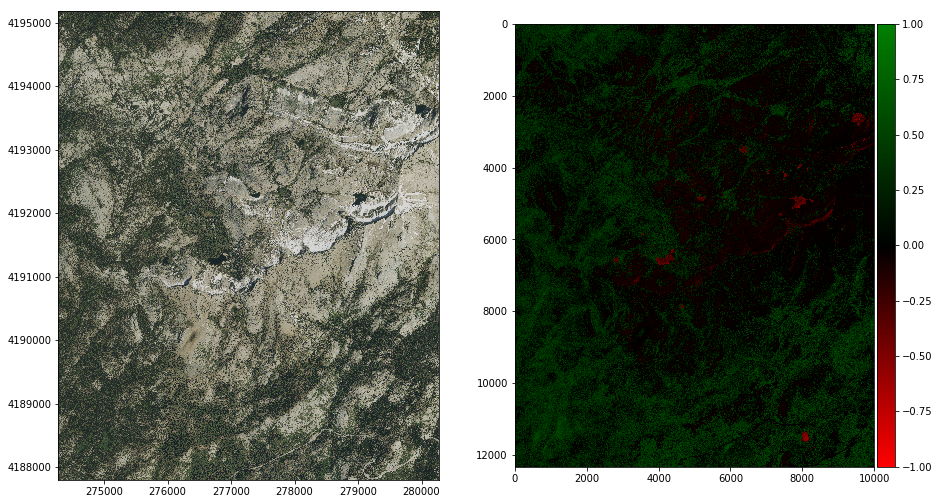

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))





show(dataset, ax=ax[0])

cmap = LinearSegmentedColormap.from_list('cmap', ['red', 'black', 'green'])

nvdiPlot = ax[1].imshow(nvdi, cmap=cmap, vmin=-1, vmax=1)
divider = make_axes_locatable(ax[1])

cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(nvdiPlot, cax=cax)





plt.show()

In [77]:
dataset.close()